In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
plt.rcParams['figure.figsize'] = (16./3, 9./3)
def plot_model(sess, model, xy, labels, feature_lambda, title=''):
    from pandas import DataFrame
    xx, yy = np.meshgrid(np.linspace(-1.2,1.2,400), np.linspace(-1.2,1.2,400))
    prediction = sess.run(model, feed_dict={x: np.array([feature_lambda(xxval, yyval) for xxval, yyval in zip(xx.flatten(), yy.flatten())])})
    Z = prediction.reshape(xx.shape)
    df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
    markers = {0:'bs', 1:'r^'}
    _, ax = plt.subplots(figsize=(5, 5))
    cs = ax.contourf(xx, yy, Z, 20, cmap='coolwarm', alpha=.9)
    ax.clabel(cs, colors='gray')
    cs = ax.contour(xx, yy, Z, cmap='gray', levels=[0, 0.5, 1.0], linestyles='--', linewidths=2)
    ax.clabel(cs, colors='k')
    predictions = sess.run(model, feed_dict={x: xy})
    for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
    ax.set_xlim([-1.1, 1.1])
    ax.set_ylim([-1.1, 1.1])
    plt.grid(linestyle='--', alpha=0.5)
    plt.title(title)
    plt.show()

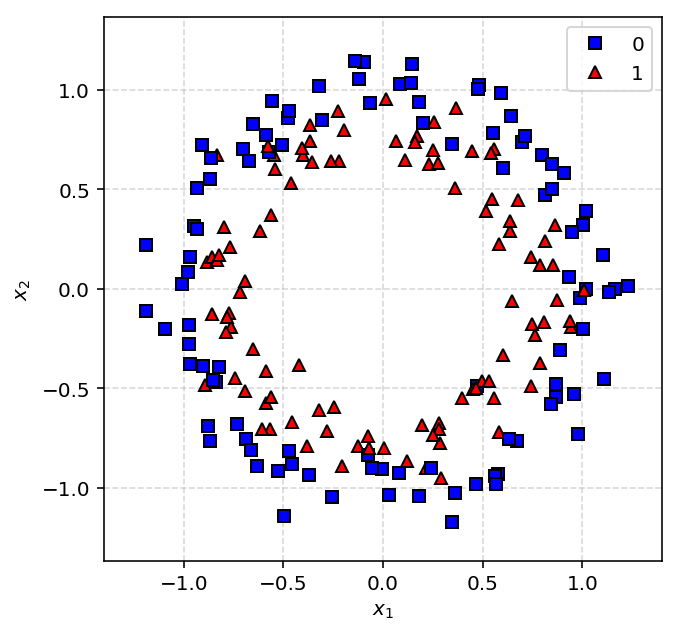

In [3]:
from sklearn.datasets import make_circles
from pandas import DataFrame

# 데이터 생성
xy, labels = make_circles(n_samples=200, noise=0.1, random_state=717)
labels = labels.reshape(-1,1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
        x0, y0 = xy0.values
        plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.4, 1.4])
ax.set_ylim([-1.4, 1.4])
plt.legend([0, 1])
plt.show()

In [4]:
# 특성값 정의
f1 = lambda x,y: [x, y]
f2 = lambda x,y: [x**2, y**2]

W=[-0.03984667 -0.04534506], b=0.01354103721678257


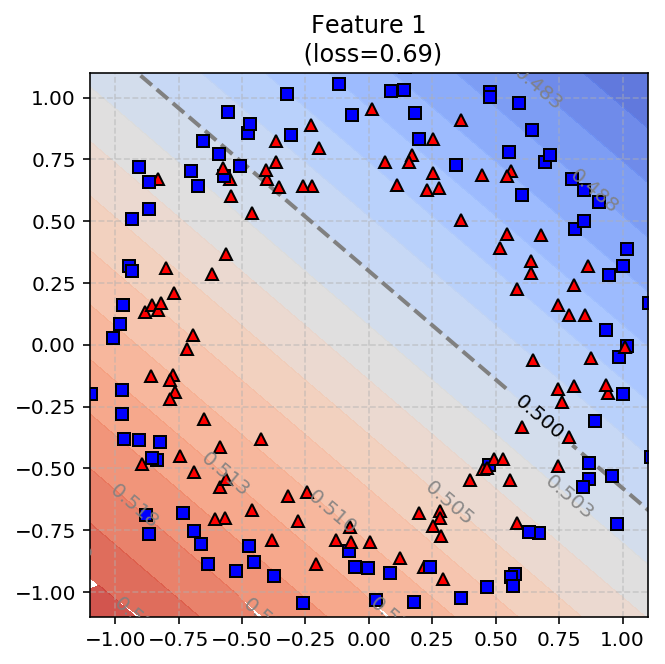

W=[-3.0084474 -3.2035053], b=2.558513879776001


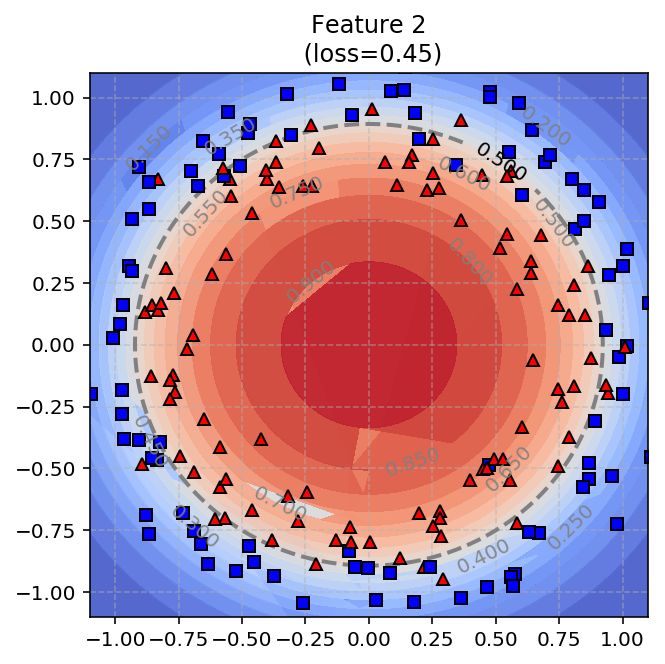

In [5]:
for i, f_fn in enumerate([f1, f2], 1):
    # 특성값 추출
    features = np.array([f_fn(xval, yval) for xval, yval in xy])
    dim_features = features.shape[1]
    
    # 예측모델
    x = tf.placeholder(tf.float32, shape=(None, dim_features))
    W = tf.Variable(tf.ones([dim_features,1]), tf.float32)
    b = tf.Variable(1.0, tf.float32)
    yhat = tf.sigmoid(tf.matmul(x, W) + b)
    
    # 손실함수
    y = tf.placeholder(tf.float32, shape=(None, 1))
    loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

    # 수치최적화 알고리즘
    MaxEpochs = 15
    lr = 0.1
    optimizer = tf.train.AdamOptimizer(lr)
    train = optimizer.minimize(loss)

    from helper import generate_batches
    # 데이터 섞기
    np.random.seed(7382)
    idx = np.arange(0, len(features))
    np.random.shuffle(idx)
    shuffled_features = features[idx]
    shuffled_labels = labels[idx]

    # 스토캐스틱 방법
    batch_size = 25
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    for epoch in range(MaxEpochs):
        for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
            sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
    
    loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
    W_sgd, b_sgd = sess.run([W, b])
    print('W={}, b={}'.format(W_sgd.flatten(), b_sgd))
    plot_model(sess, yhat, xy, labels, f_fn, 'Feature {}\n (loss={:1.2f})'.format(i, loss_val))

In [6]:
# 입력 데이터
f_fn = lambda x,y: [x, y]
features = np.array([f_fn(xval, yval) for xval, yval in xy])

/Users/yhbyhb/anaconda3/envs/deep-learning/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


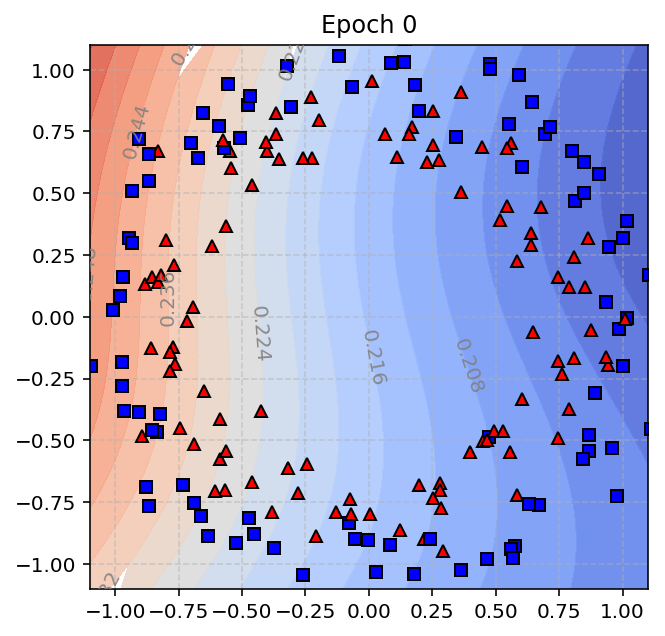

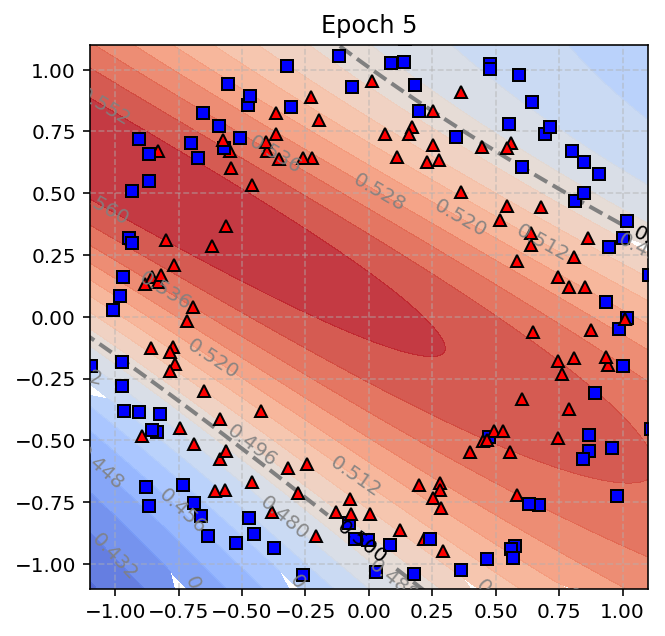

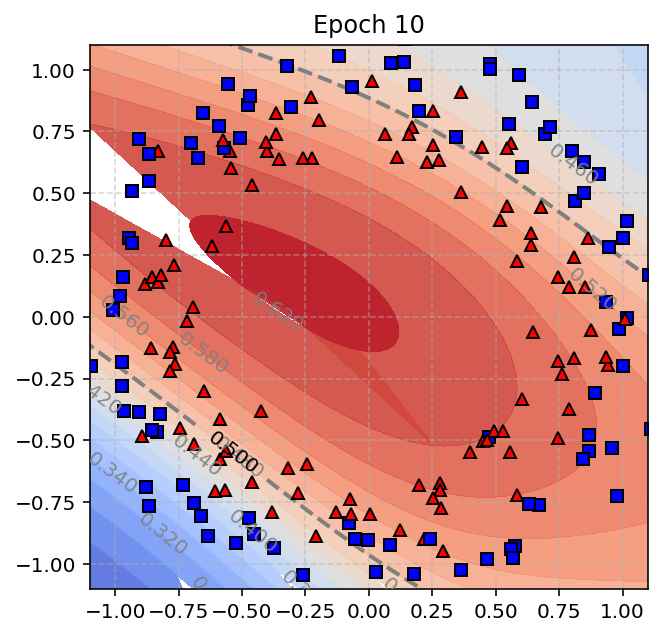

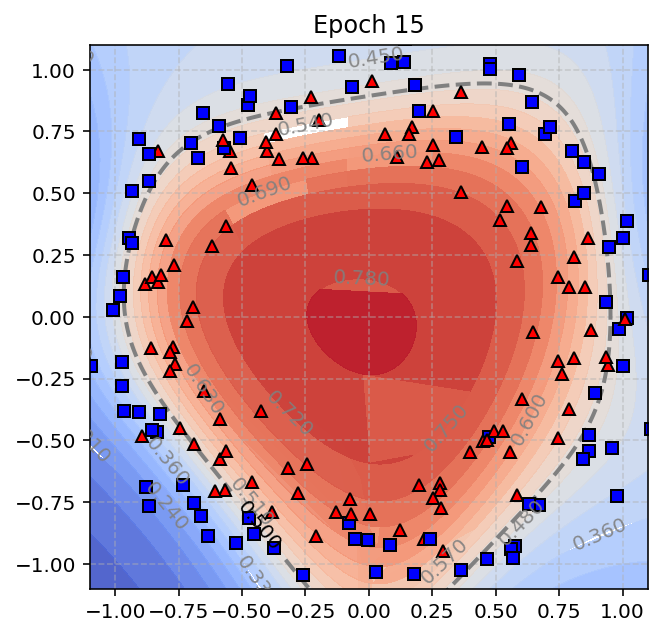

0.4050177


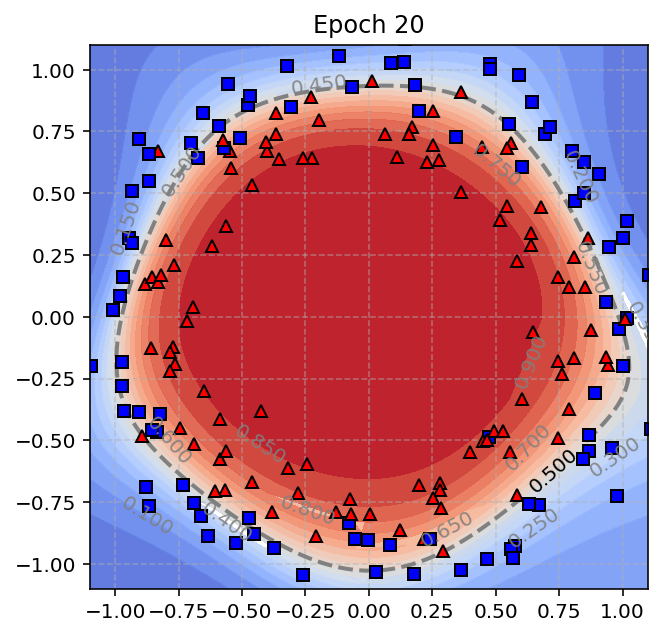

In [7]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

with tf.variable_scope("Neural_Network"):
    # 레이어 1의 Weight
    W1 = tf.Variable(tf.random_normal([2, num_hidden1], seed=624))
    b1 = tf.Variable(tf.random_normal([num_hidden1], seed=624))

    # 레이어 2의 Weight
    W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2], seed=624))
    b2 = tf.Variable(tf.random_normal([num_hidden2], seed=624))

    # 레이어 3의 Weight
    W3 = tf.Variable(tf.random_normal([num_hidden2, 1], seed=624))
    b3 = tf.Variable(tf.random_normal([1], seed=624))

# 은닉층 1
hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# 은닉층 2
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# 출력층
yhat = tf.nn.sigmoid(tf.matmul(hidden2, W3) + b3)

#손실함수
loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

# 수치최적화 알고리즘
MaxEpochs = 20
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 5 == 0:
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch+1))

/Users/yhbyhb/anaconda3/envs/deep-learning/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


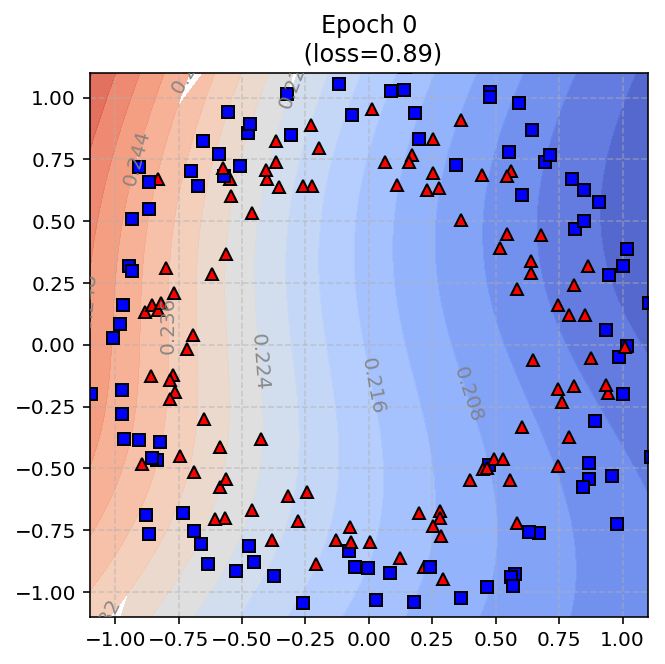

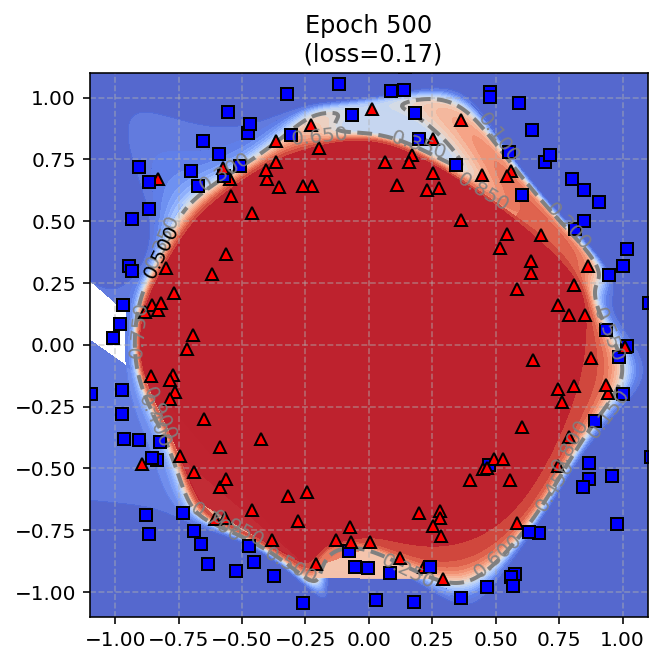

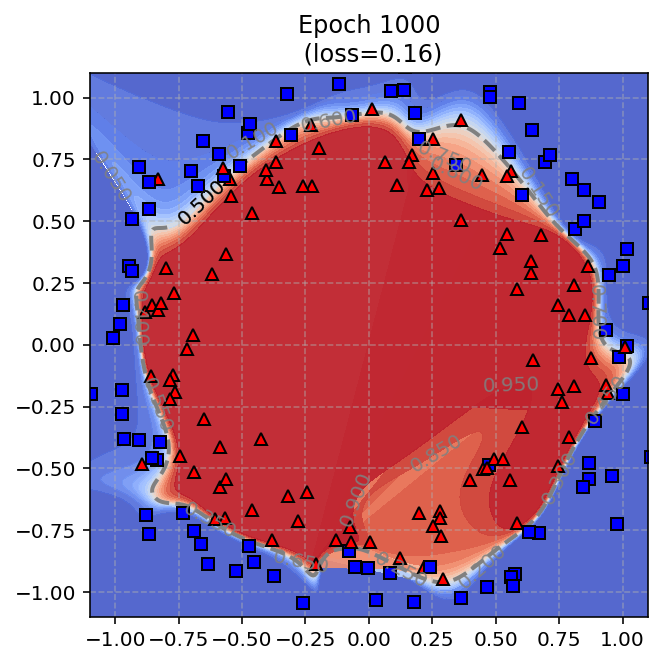

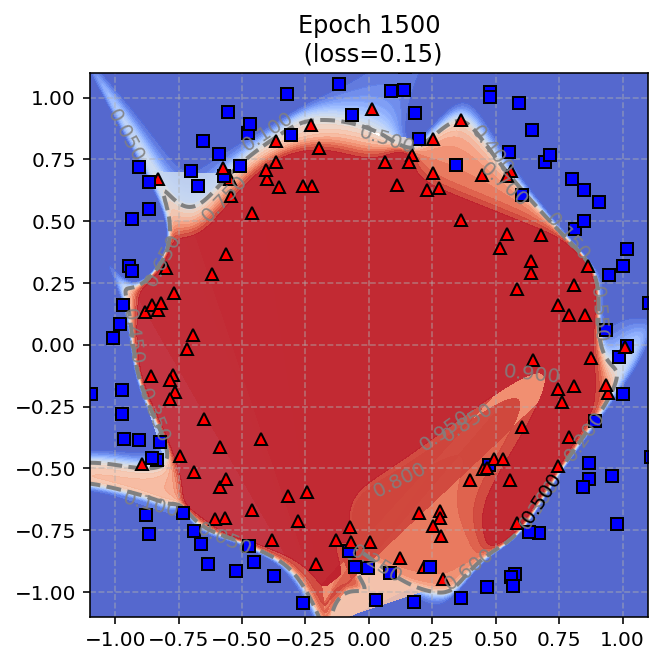

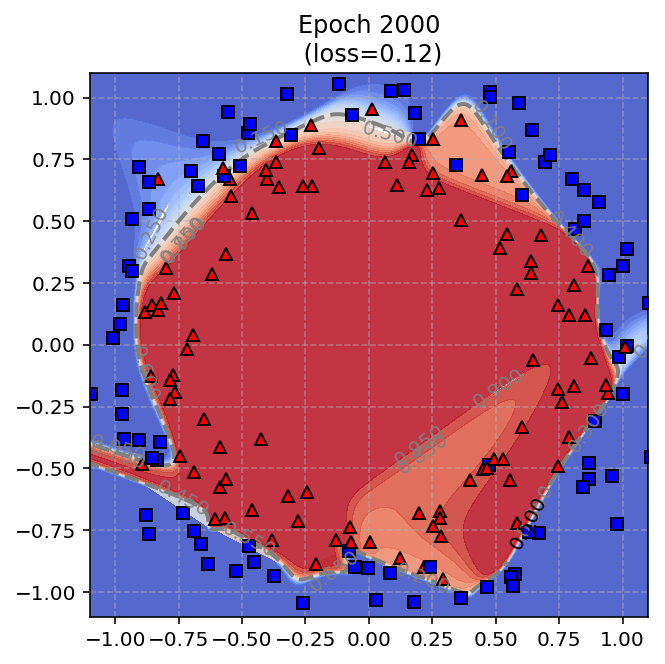

0.2009227


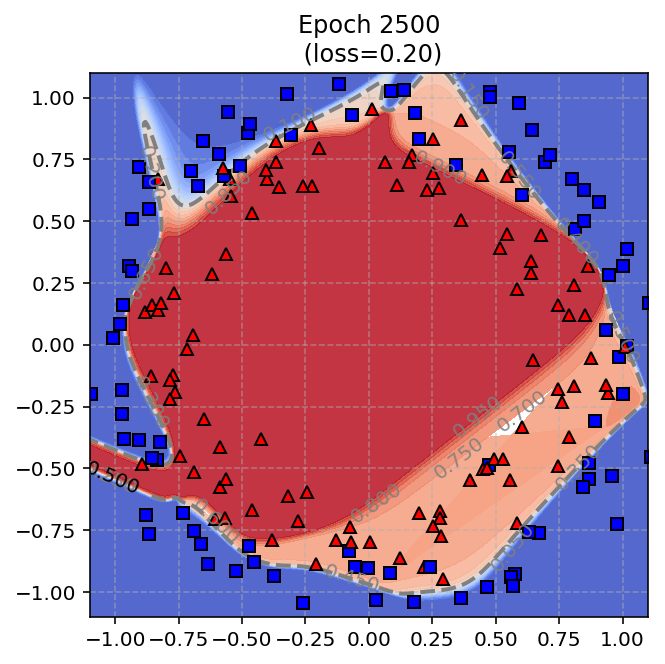

In [8]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=tf.random_normal_initializer(seed=624),
                                          biases_initializer=tf.random_normal_initializer(seed=624))

loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

# 수치최적화 알고리즘
MaxEpochs = 2500
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 500 == 0:
        loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}\n (loss={:1.2f})'.format(epoch, loss_val))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}\n (loss={:1.2f})'.format(epoch+1, loss_val))

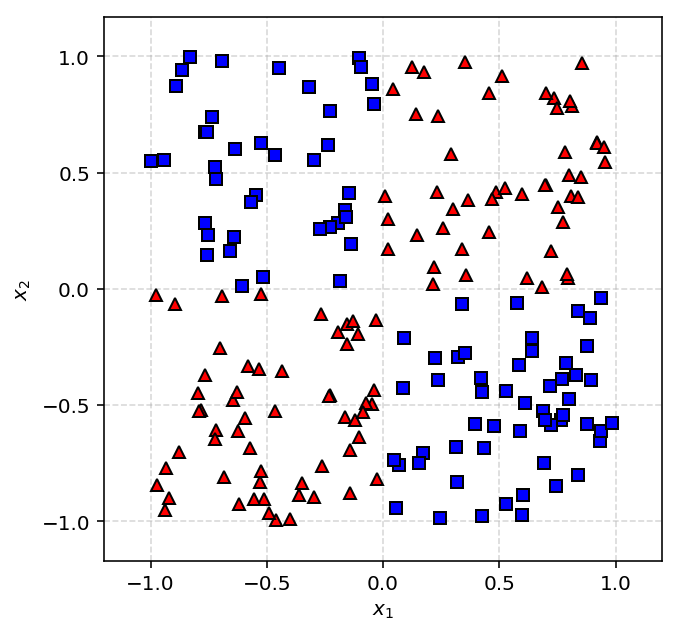

In [9]:
from pandas import DataFrame

# 체커보드 데이터 생성
np.random.seed(410)
xy = np.random.uniform(-1,1, (200,2))
labels = np.zeros((200), dtype=np.int32)
labels[xy[:,0] * xy[:,1] > 0] = 1
labels = labels.reshape(-1, 1)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

In [10]:
features = np.array([[xval, yval] for xval, yval in xy])
f_fn = lambda x,y: [x, y]

0


/Users/yhbyhb/anaconda3/envs/deep-learning/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


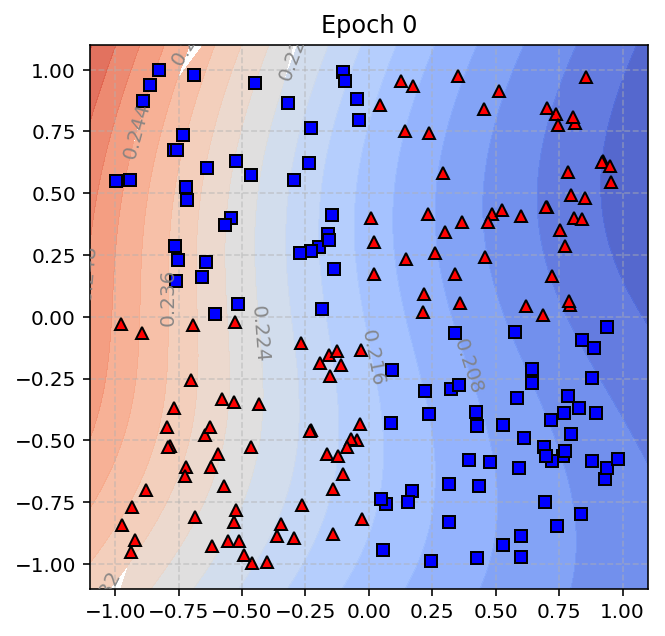

5


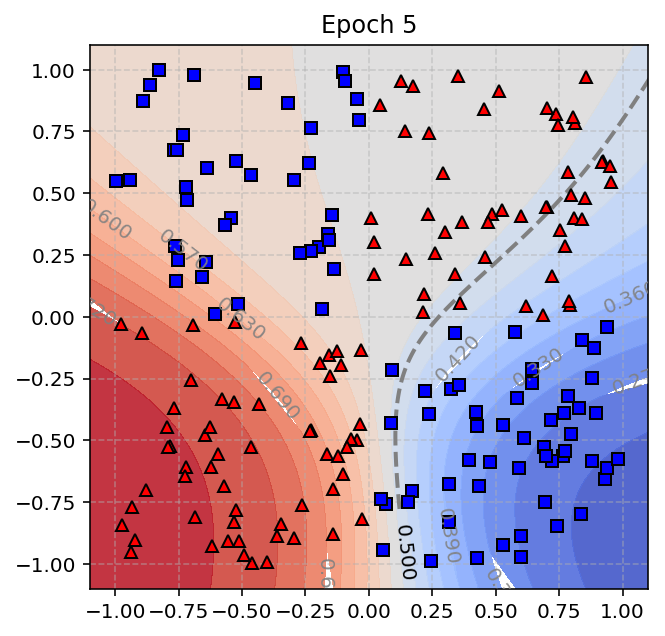

10


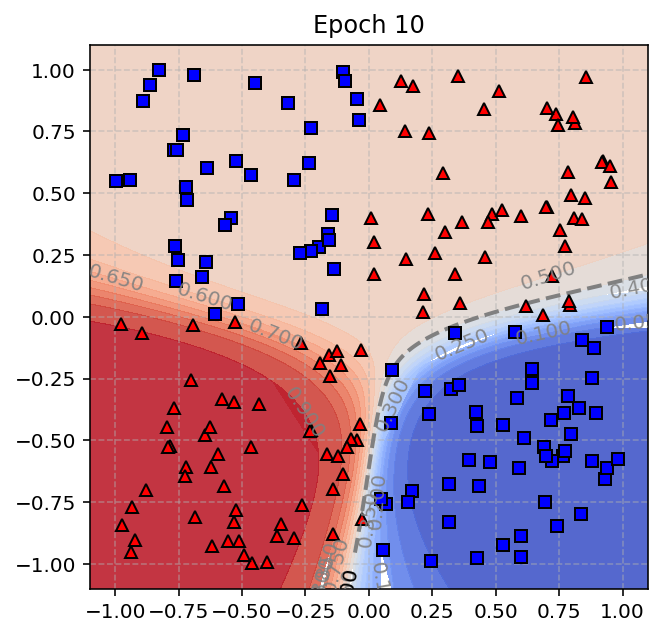

15


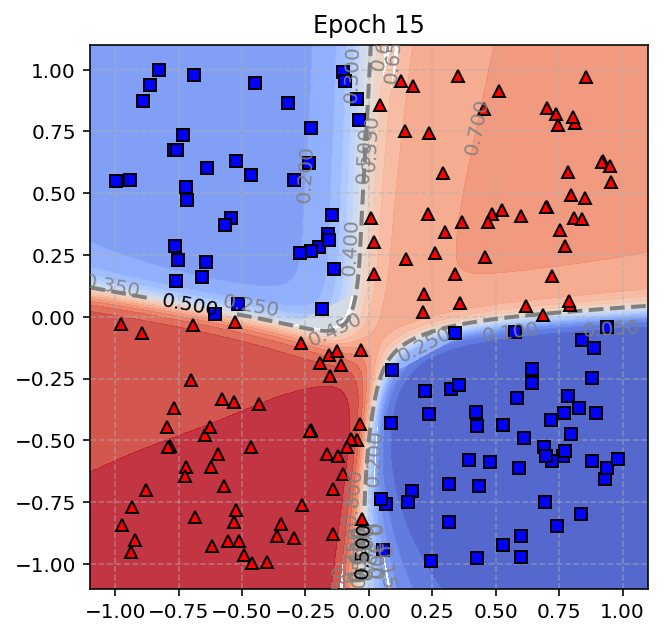

20


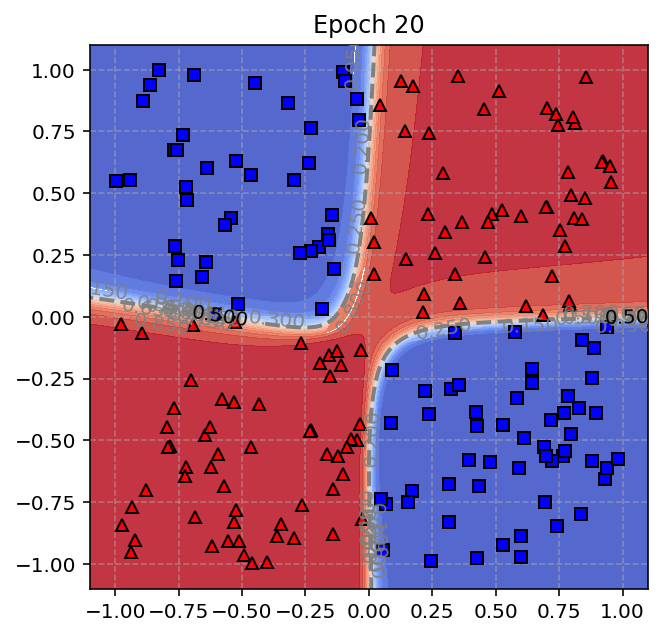

0.022389645


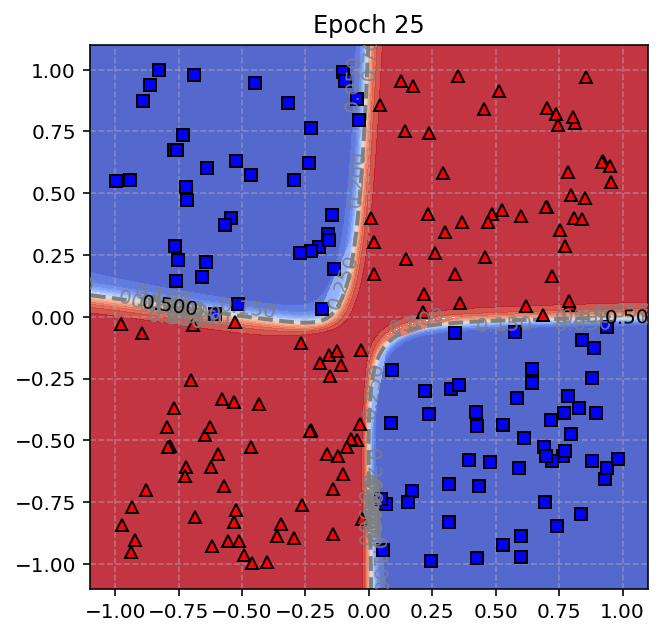

In [11]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

with tf.variable_scope("Neural_Network"):
    # 레이어 1의 Weight
    W1 = tf.Variable(tf.random_normal([2, num_hidden1], seed=624))
    b1 = tf.Variable(tf.random_normal([num_hidden1], seed=624))

    # 레이어 2의 Weight
    W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2], seed=624))
    b2 = tf.Variable(tf.random_normal([num_hidden2], seed=624))

    # 레이어 3의 Weight
    W3 = tf.Variable(tf.random_normal([num_hidden2, 1], seed=624))
    b3 = tf.Variable(tf.random_normal([1], seed=624))

# 은닉층 1
hidden1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

# 은닉층 2
hidden2 = tf.nn.sigmoid(tf.matmul(hidden1, W2) + b2)

# 출력층
yhat = tf.nn.sigmoid(tf.matmul(hidden2, W3) + b3)

loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

# 수치최적화 알고리즘
MaxEpochs = 25
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 5 == 0:
        print(epoch)
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch+1))

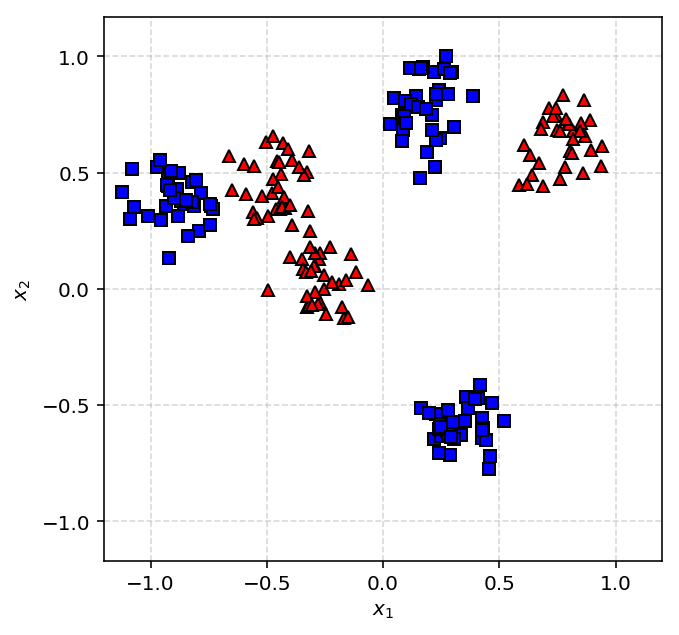

In [12]:
from sklearn.datasets import make_blobs
# 불규칙 데이터 생성
xy, labels = make_blobs(n_samples=200, center_box=(-1,1), centers=6,cluster_std=0.1, random_state=20)
labels = labels % 2
labels = labels.reshape(-1,1)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=xy[:,0], y=xy[:,1], label=labels.flatten()))
colors = {0:'red', 1:'blue'}
_, ax = plt.subplots(figsize=(5, 5))
grouped = df.groupby('label')
markers = {0:'bs', 1:'r^'}
for k, xy0 in df[['x', 'y']].iterrows():
    x0, y0 = xy0.values
    plt.plot(x0, y0, markers[labels[k][0]], mec='k')
plt.axis('equal')
plt.grid(linestyle='--', alpha=0.5)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])
# plt.legend([0, 1])
plt.show()

In [13]:
features = np.array([[xval, yval] for xval, yval in xy])
f_fn = lambda x,y: [x, y]

0


/Users/yhbyhb/anaconda3/envs/deep-learning/lib/python3.5/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


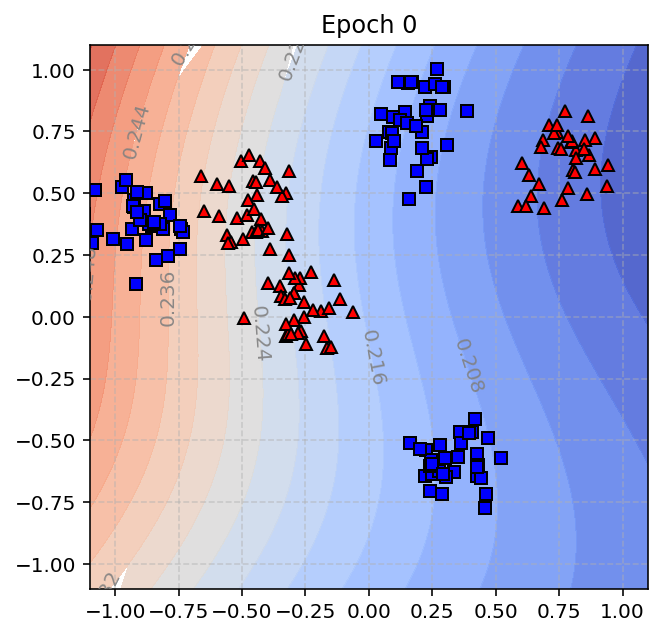

5


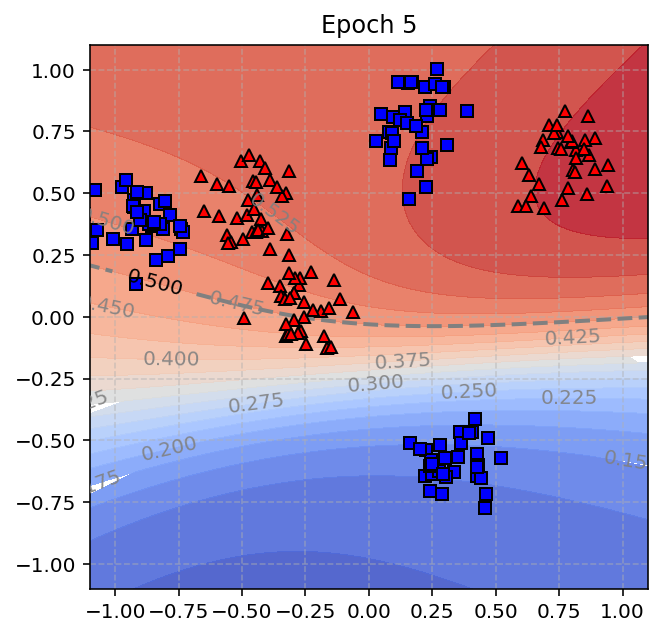

10


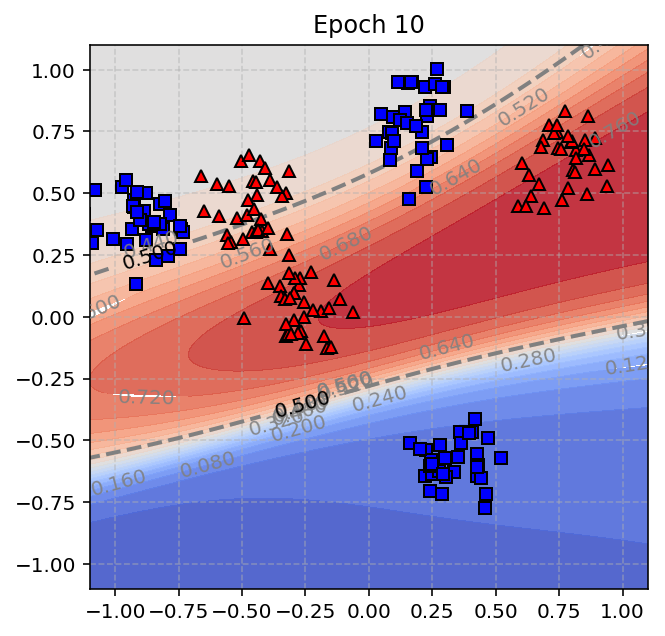

15


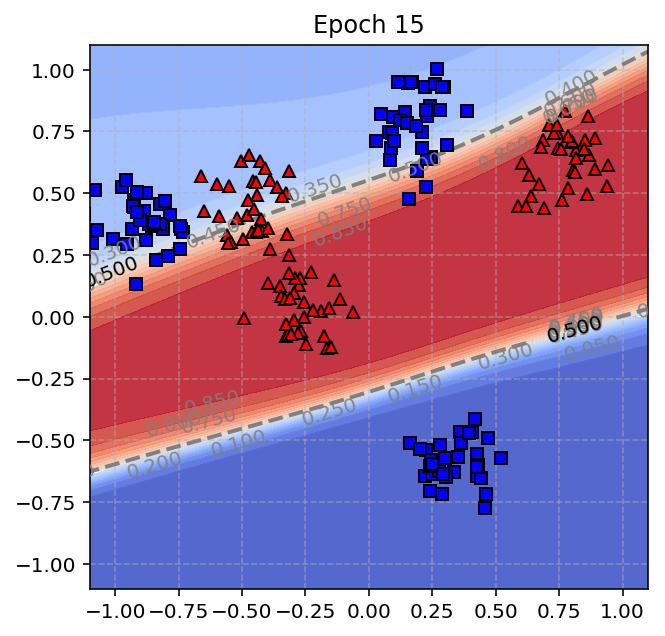

20


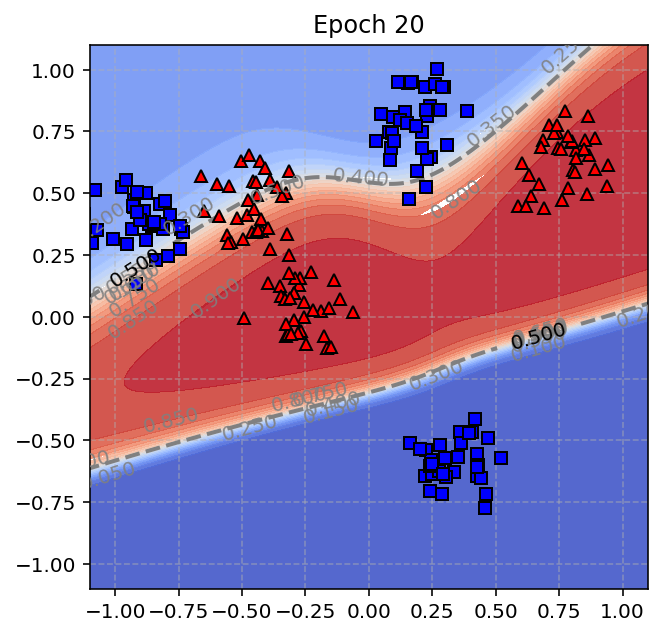

0.06552219


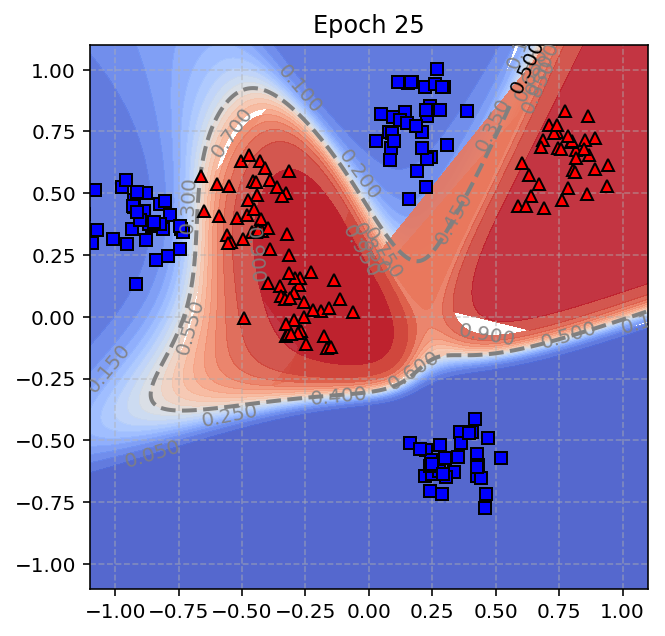

In [14]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 출력층
yhat =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=tf.nn.sigmoid,
                                          weights_initializer=tf.random_normal_initializer(seed=624),
                                          biases_initializer=tf.random_normal_initializer(seed=624))

loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

# 수치최적화 알고리즘
MaxEpochs = 25
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 5 == 0:
        print(epoch)
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch+1))

0


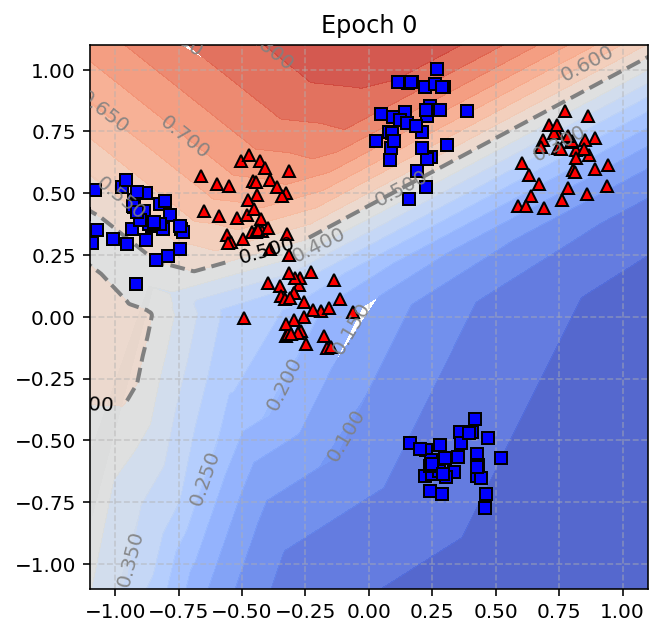

5


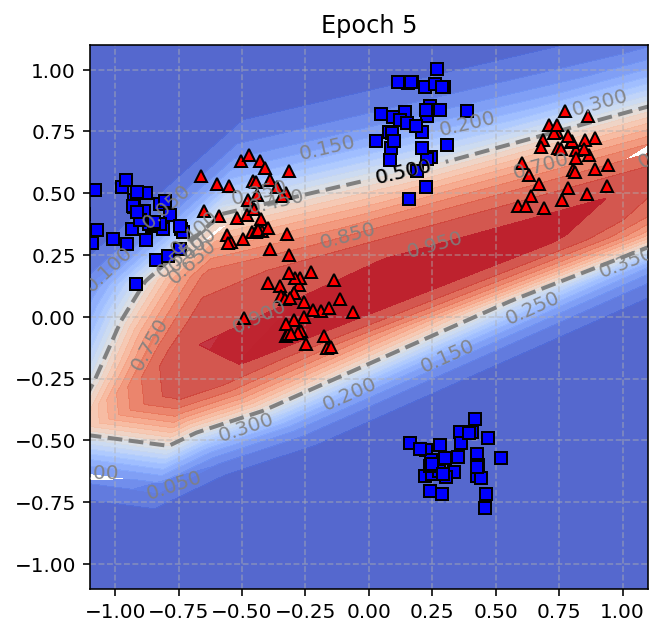

10


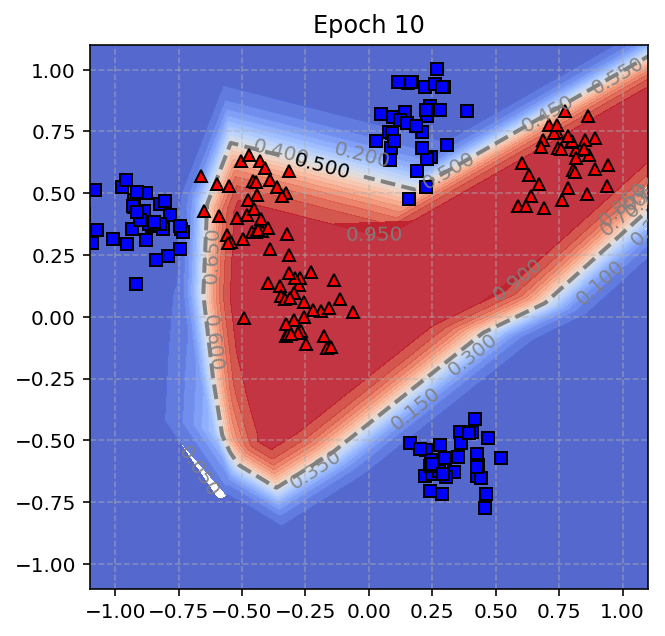

15


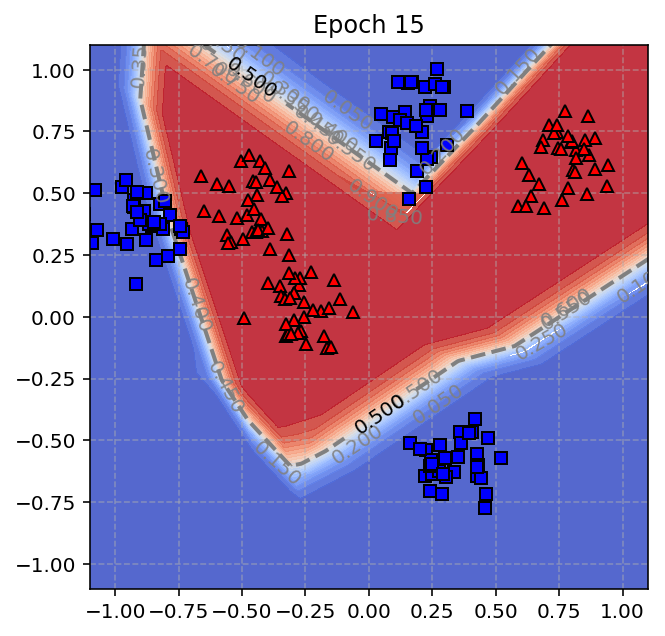

20


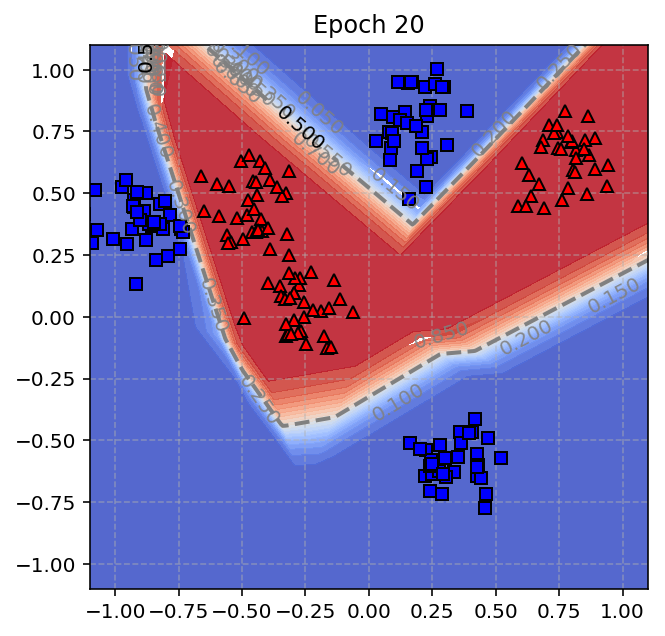

0.002029205


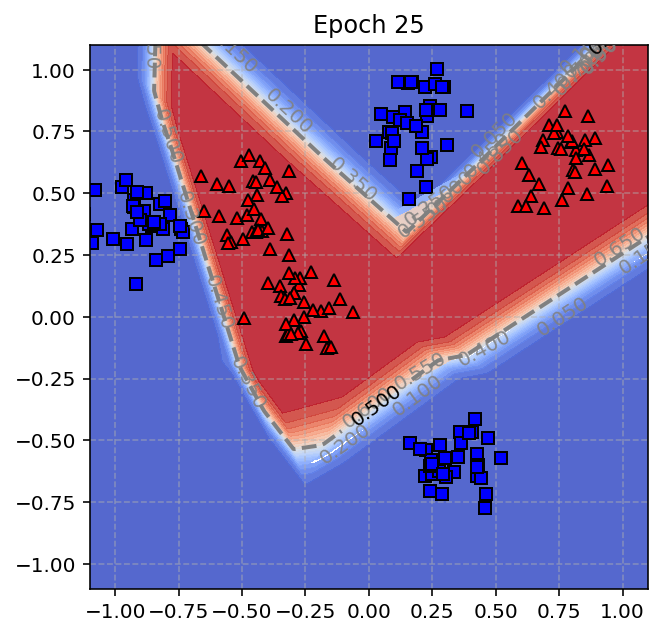

In [15]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

with tf.variable_scope("Neural_Network"):
    # 레이어 1의 Weight
    W1 = tf.Variable(tf.random_normal([2, num_hidden1], seed=624))
    b1 = tf.Variable(tf.random_normal([num_hidden1], seed=624))

    # 레이어 2의 Weight
    W2 = tf.Variable(tf.random_normal([num_hidden1, num_hidden2], seed=624))
    b2 = tf.Variable(tf.random_normal([num_hidden2], seed=624))

    # 레이어 3의 Weight
    W3 = tf.Variable(tf.random_normal([num_hidden2, 1], seed=624))
    b3 = tf.Variable(tf.random_normal([1], seed=624))

# 은닉층 1
hidden1 = tf.nn.relu(tf.matmul(x, W1) + b1)

# 은닉층 2
hidden2 = tf.nn.relu(tf.matmul(hidden1, W2) + b2)

# 출력층
yhat = tf.nn.sigmoid(tf.matmul(hidden2, W3) + b3)

loss = tf.reduce_mean(-y * tf.log(yhat) - (1-y) * tf.log(1-yhat))

# 수치최적화 알고리즘
MaxEpochs = 25
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 5 == 0:
        print(epoch)
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch+1))

0


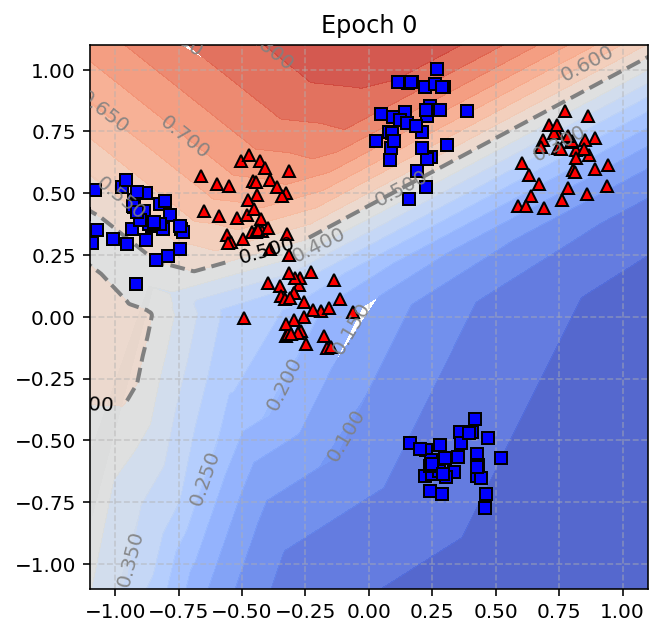

5


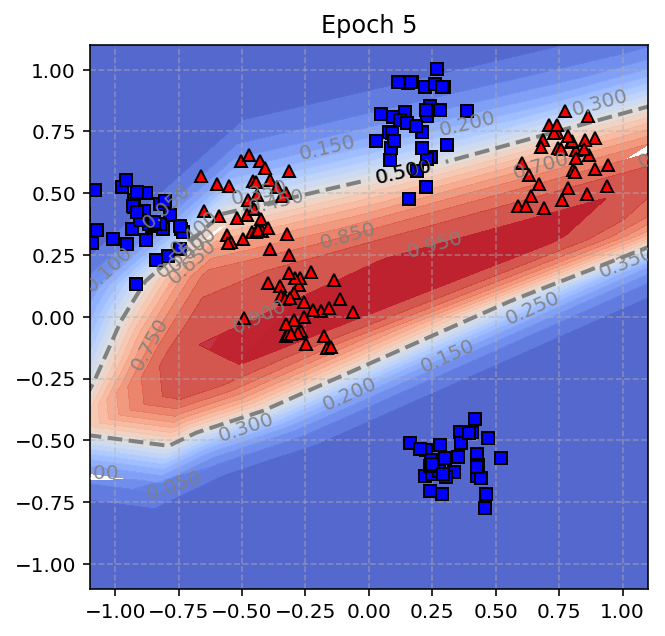

10


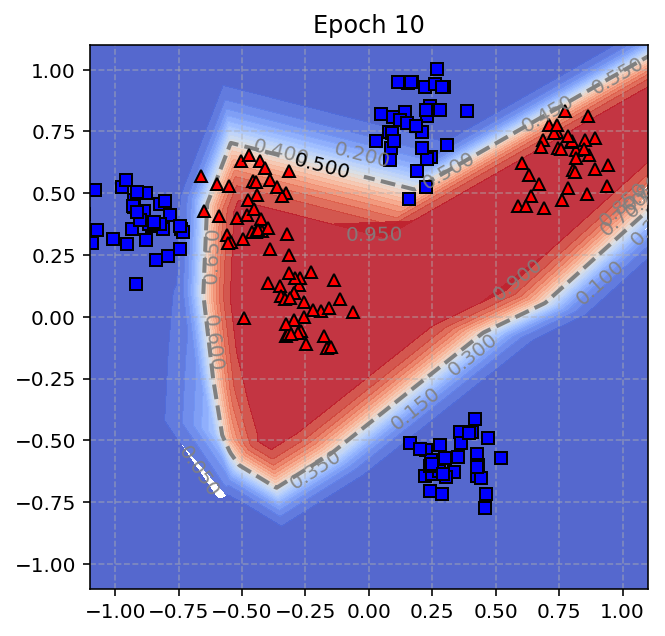

15


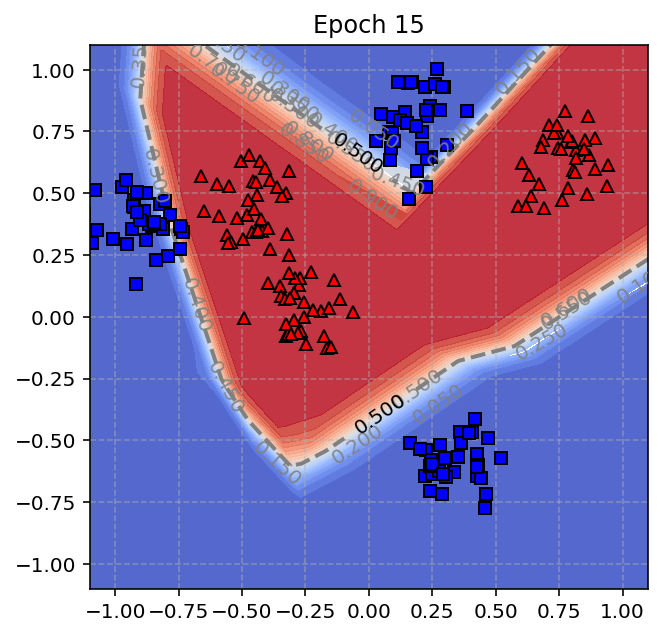

20


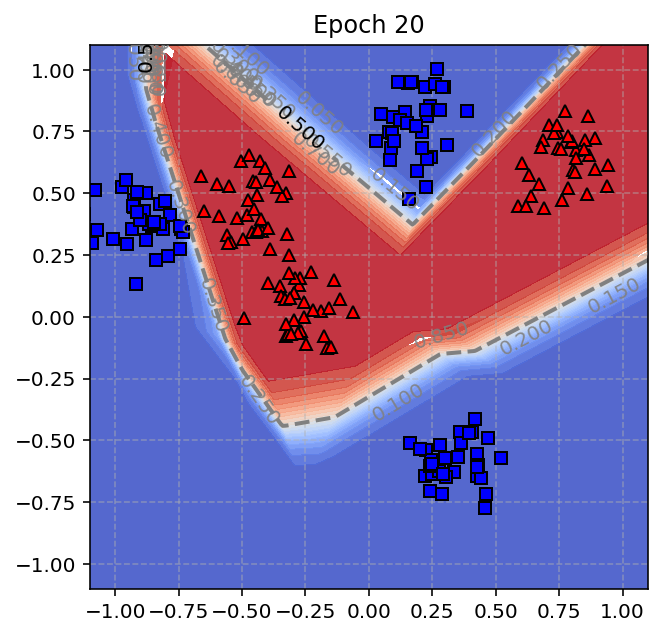

0.0020291992


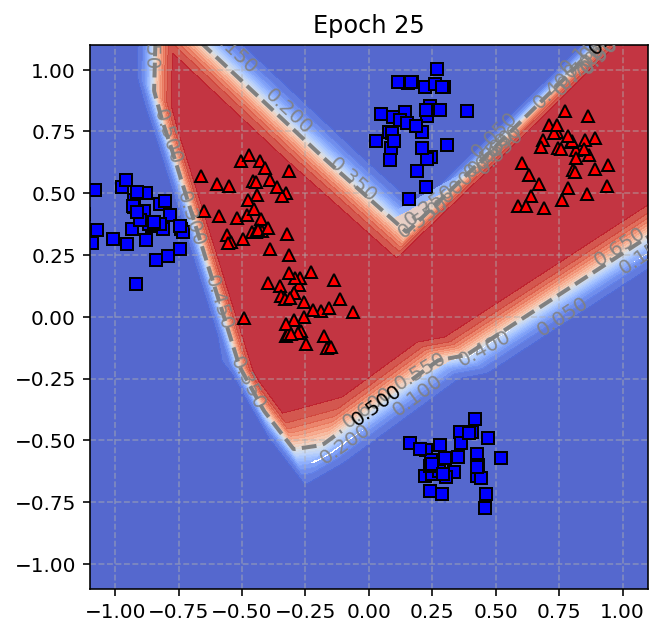

In [16]:
num_hidden1 = 10
num_hidden2 = 5

x = tf.placeholder(tf.float32, shape=(None, 2))
y = tf.placeholder(tf.float32, shape=(None, 1))

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.relu,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.relu,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 출력층
logit =  tf.contrib.layers.fully_connected(hidden2, 1,
                                          activation_fn=None,
                                          weights_initializer=tf.random_normal_initializer(seed=624),
                                          biases_initializer=tf.random_normal_initializer(seed=624))
yhat = tf.nn.sigmoid(logit)
loss = tf.reduce_mean(tf.losses.sigmoid_cross_entropy(y, logit))


# 수치최적화 알고리즘
MaxEpochs = 25
lr = 0.1
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

from helper import generate_batches
# 데이터 섞기
np.random.seed(7382)
idx = np.arange(0, len(features))
np.random.shuffle(idx)
shuffled_features = features[idx]
shuffled_labels = labels[idx]

# 스토캐스틱 방법
batch_size = 25
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    if epoch % 5 == 0:
        print(epoch)
        plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch))
    for x_batch, y_batch in generate_batches(batch_size, shuffled_features, shuffled_labels):
        sess.run(train, feed_dict={x: x_batch, y: y_batch.reshape(-1,1)})
loss_val = sess.run(loss, feed_dict={x: features, y: labels.reshape(-1,1)})
print(loss_val)
plot_model(sess, yhat, xy, labels, f_fn, 'Epoch {}'.format(epoch+1))

In [17]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
# MNIST 데이터 로드
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [18]:
features = mnist.train.images
labels = mnist.train.labels

In [19]:
num_hidden1 = 20
num_hidden2 = 10

x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

# 은닉층 1
hidden1 = tf.contrib.layers.fully_connected(x, num_hidden1, 
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 은닉층 2
hidden2 = tf.contrib.layers.fully_connected(hidden1, num_hidden2,
                                            activation_fn=tf.nn.sigmoid,
                                            weights_initializer=tf.random_normal_initializer(seed=624),
                                            biases_initializer=tf.random_normal_initializer(seed=624))

# 출력층
logit =  tf.contrib.layers.fully_connected(hidden2, 10,
                                          activation_fn=None,
                                          weights_initializer=tf.random_normal_initializer(seed=624),
                                          biases_initializer=tf.random_normal_initializer(seed=624))

yhat = tf.nn.softmax(logit)

# 정확도
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(yhat,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# 손실함수
loss = tf.reduce_mean(tf.losses.softmax_cross_entropy(y, logit))

# 수치최적화 알고리즘
batch_size = 128
lr = 0.01
MaxEpochs = 10
optimizer = tf.train.AdamOptimizer(lr)
train = optimizer.minimize(loss)

# 스토캐스틱 방법
tf.set_random_seed(624)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
for epoch in range(MaxEpochs):
    for step in range(len(mnist.train.images) // batch_size + 1):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict={x:batch_xs, y:batch_ys})
        if step % 200 == 0:
            curr_loss = sess.run(loss, feed_dict={x:features, y:labels})
            curr_acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
            print(epoch, step, curr_loss, curr_acc)
    print("")

0 0 4.707821 0.1095
0 200 0.65082735 0.8308
0 400 0.42629257 0.881

1 0 0.41704354 0.8809
1 200 0.341513 0.8967
1 400 0.3111145 0.9049

2 0 0.303371 0.9117
2 200 0.2773343 0.9138
2 400 0.25252038 0.9196

3 0 0.25368643 0.9184
3 200 0.24110223 0.921
3 400 0.22875579 0.9247

4 0 0.22592075 0.9277
4 200 0.21723373 0.9314
4 400 0.20983256 0.9273

5 0 0.21249068 0.928
5 200 0.1990102 0.9292
5 400 0.19601825 0.9308

6 0 0.19167271 0.9322
6 200 0.18408509 0.9362
6 400 0.18484594 0.9346

7 0 0.17478554 0.937
7 200 0.17358638 0.9365
7 400 0.16581786 0.9345

8 0 0.17302385 0.9355
8 200 0.16886225 0.9356
8 400 0.15807983 0.938

9 0 0.16368331 0.9377
9 200 0.15149495 0.9383
9 400 0.15198076 0.9379

